# Introduction to Machine Learning

Welcome to this interactive tutorial on **Machine Learning (ML)**. Here, you will learn:
1. What is Machine Learning?
2. The differences between Supervised and Unsupervised Learning.
3. An overview of Reinforcement Learning.
4. Types of ML Algorithms: Regression, Classification, and Clustering.

By the end of this tutorial, you will have a solid understanding of fundamental ML concepts and practical skills for implementing ML algorithms using Python.

---

### Prerequisites
- Basic knowledge of Python programming.
- Familiarity with libraries like `scikit-learn`, `matplotlib`, and `numpy`.

**Let's dive in!**


## 1. What is Machine Learning?

**Machine Learning (ML)** is a subset of Artificial Intelligence (AI) that enables computers to learn patterns from data and make predictions or decisions without explicit programming.

---

### Key Features:
- It is **data-driven**, meaning it relies heavily on the quality and quantity of input data.
- Models improve over time as they learn from new data.

---

### Types of Machine Learning:
1. **Supervised Learning**: Learning from labeled data.
2. **Unsupervised Learning**: Identifying patterns in unlabeled data.
3. **Reinforcement Learning**: Learning by interacting with the environment.

### Real-World Applications:
- Predictive Analytics: Forecasting sales or stock prices.
- Image Recognition: Recognizing faces in photos.
- Natural Language Processing: Powering chatbots like ChatGPT.
- Autonomous Vehicles: Enabling self-driving cars.

---


## 2. Supervised vs. Unsupervised Learning

Machine Learning models can be broadly categorized as:

### 2.1 Supervised Learning
The model learns from **labeled data** where the input features (`X`) and corresponding labels (`y`) are provided.

- Example: Predicting house prices based on square footage (Regression).
- Algorithms: Linear Regression, Logistic Regression, Decision Trees.

---

### 2.2 Unsupervised Learning
The model identifies patterns or groups in **unlabeled data**, without predefined labels.

- Example: Clustering customers based on purchasing behavior.
- Algorithms: KMeans, DBSCAN, Principal Component Analysis (PCA).

---

### Comparison:
| Feature             | Supervised Learning     | Unsupervised Learning  |
|---------------------|-------------------------|-------------------------|
| **Data**            | Labeled (X, y)         | Unlabeled (X only)      |
| **Objective**       | Predict labels         | Identify patterns       |
| **Common Tasks**    | Regression, Classification | Clustering, Dimensionality Reduction |


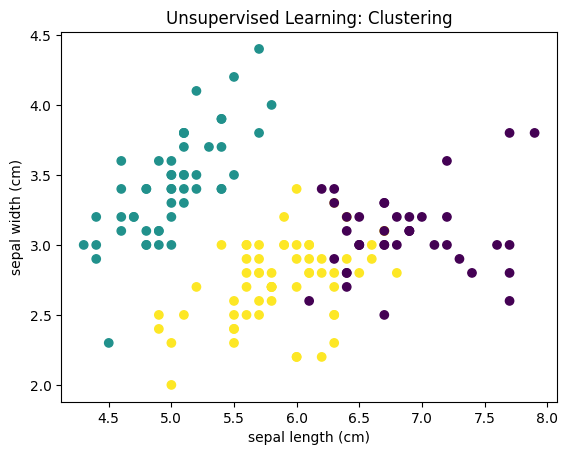

Supervised Learning Accuracy: 1.00
Cluster Centers:
[[6.85384615 3.07692308 5.71538462 2.05384615]
 [5.006      3.428      1.462      0.246     ]
 [5.88360656 2.74098361 4.38852459 1.43442623]]


In [1]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Load Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Supervised Learning Example
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)
supervised_accuracy = clf.score(X_test, y_test)

# Unsupervised Learning Example
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)
cluster_centers = kmeans.cluster_centers_

# Visualizing clusters
plt.scatter(X[:, 0], X[:, 1], c=kmeans.labels_, cmap='viridis')
plt.title("Unsupervised Learning: Clustering")
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.show()

print(f"Supervised Learning Accuracy: {supervised_accuracy:.2f}")
print(f"Cluster Centers:\n{cluster_centers}")


## 3. Reinforcement Learning Overview

**Reinforcement Learning (RL)** involves an agent learning by interacting with its environment. The agent's goal is to maximize rewards over time.

---

### Key Concepts:
1. **Agent**: The learner or decision-maker.
2. **Environment**: The external system the agent interacts with.
3. **Reward**: Feedback signal for evaluating actions.
4. **Policy**: A strategy defining the agent's actions.

---

### Real-World Applications:
- Gaming: AI that plays chess or Go.
- Robotics: Automated control systems.
- Autonomous Vehicles: Driving decisions based on road conditions.


In [25]:
from stable_baselines3 import PPO
import gymnasium as gym
from gymnasium.wrappers import RecordVideo

# Create the environment with the render_mode set to 'rgb_array' for high-quality video recording
env = gym.make("CartPole-v1", render_mode="rgb_array")  # Use rgb_array for video capture

# Wrap the environment to record the video with improved settings
env = RecordVideo(
    env,
    video_folder="cartpole_high_quality_videos",  # Save videos in this folder
    name_prefix="cartpole_episode",  # Prefix for video files
    step_trigger=lambda step: step % 100 == 0,  # Record every 100 steps
    video_length=500,  # Record up to 500 steps per episode
    fps=30,  # Frames per second for smoother playback
)

# Train the agent
model = PPO("MlpPolicy", env, verbose=1)
model.learn(total_timesteps=10000)

# Test the trained agent
state, _ = env.reset()
for _ in range(500):  # Increase the length of the test run for better videos
    action, _ = model.predict(state)
    state, reward, terminated, truncated, info = env.step(action)
    
    # Render is not required for video quality but helpful for debugging
    env.render()

    # If the episode ends, reset the environment
    if terminated or truncated:
        state, _ = env.reset()

# Close the environment after testing
env.close()


Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 22.9     |
|    ep_rew_mean     | 22.9     |
| time/              |          |
|    fps             | 91       |
|    iterations      | 1        |
|    time_elapsed    | 22       |
|    total_timesteps | 2048     |
---------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 27.1        |
|    ep_rew_mean          | 27.1        |
| time/                   |             |
|    fps                  | 80          |
|    iterations           | 2           |
|    time_elapsed         | 50          |
|    total_timesteps      | 4096        |
| train/                  |             |
|    approx_kl            | 0.008948768 |
|    clip_fraction        | 0.115       |
|    clip_range           | 0.2         |
|    entropy_loss   